# Reading the nc files

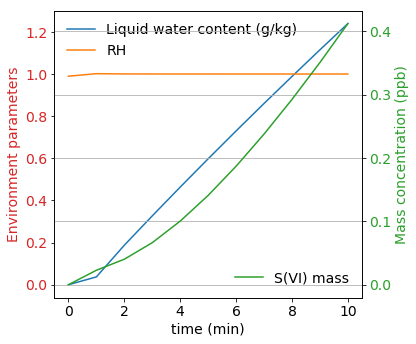

In [8]:
import sys, os
import scipy.io, numpy
import numpy as np
import pylab
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
mpl.rcParams['font.size'] = 14
#mpl.rcParams['figure.figsize'] = 6, 6

ncf1  = scipy.io.netcdf_file("mono_nacl/urban_plume_aq_chem_process.nc",mmap=False)

#environment factors
time = ncf1.variables["time"].data / 60
num_conc1   = ncf1.variables["tot_num_conc"].data*1e-6 #/ 1e6
h2o         = ncf1.variables["tot_h2o_conc"].data*1000 # kg/m3 to g/m3
dens        = ncf1.variables["density"].data 
rh          = ncf1.variables["rh"].data
so4         = ncf1.variables["tot_so4_conc"].data*29/96*1e9 / dens
hso4        = ncf1.variables["tot_HSO4m_conc"].data*29/97*1e9 / dens
lwc = h2o/dens # g/kg


fig, ax1 = plt.subplots(figsize=(6,5))
color = 'tab:red'
ax1.set_xlabel('time (min)')
ax1.set_ylabel(r'Environment parameters', color=color)
ax1.plot(time, lwc, ls='-', label='Liquid water content (g/kg)')
ax1.plot(time, rh,  ls='-', label='RH')
#ax1.plot(time, num_conc2, color=color, ls=':', label='Case2 number no dilution' )
ax1.tick_params(axis='y', labelcolor=color)
ax1.legend(loc=2, frameon=False)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:green'
ax2.set_ylabel(r'Mass concentration (ppb)', color=color)  # we already handled the x-label with ax1
ax2.plot(time, so4+hso4,  color = color, ls='-', label='S(VI) mass')
ax2.tick_params(axis='y', labelcolor=color)
ax2.legend(loc=4, frameon=False)

plt.grid()
plt.tight_layout()
plt.savefig("mono_nacl/figure/bulk_lwc.pdf")

In [118]:
print(ncf1.variables["tot_Hp_conc"].data)
print(ncf1.variables["tot_h2o_conc"].data)

[0.00000000e+00 1.22513696e-16 5.32658123e-16 8.43815240e-16
 1.10487418e-15 1.32782272e-15 1.52010971e-15 1.68717744e-15
 1.83300809e-15 1.96043744e-15 2.07213274e-15]
[1.83468179e-08 4.76397648e-05 2.29697790e-04 4.00648411e-04
 5.68615853e-04 7.34129318e-04 8.97368503e-04 1.05842368e-03
 1.21735337e-03 1.37420138e-03 1.52900384e-03]


# Analyze the size resolved NH4 and SO4

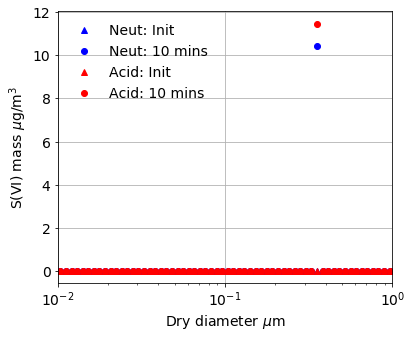

In [10]:
mpl.rcParams['figure.figsize'] = 6, 5
ncf1  = scipy.io.netcdf_file("mono_nacl/urban_plume_aq_chem_00000001_process.nc",mmap=False)
ncf2  = scipy.io.netcdf_file("mono_nacl/urban_plume_aq_chem_00000011_process.nc",mmap=False)
diam  = ncf1.variables["diam"].data * 1e6 
sul_dry_bef_neut = ncf1.variables["su_neut_dry_dist"].data * 1e9
sul_dry_aft_neut = ncf2.variables["su_neut_dry_dist"].data * 1e9
sul_dry_bef_acid = ncf1.variables["su_acid_dry_dist"].data * 1e9
sul_dry_aft_acid = ncf2.variables["su_acid_dry_dist"].data * 1e9

nh4_dry_bef_neut = ncf1.variables["nh4_neut_dry_dist"].data * 1e9
nh4_dry_aft_neut = ncf2.variables["nh4_neut_dry_dist"].data * 1e9
nh4_dry_bef_acid = ncf1.variables["nh4_acid_dry_dist"].data * 1e9
nh4_dry_aft_acid = ncf2.variables["nh4_acid_dry_dist"].data * 1e9

#plt.subplot(121)
plt.xscale('log')
plt.xlim(1e-2, 1e0)
plt.ylabel(r"S(VI) mass $\mu {\rm g/m^3}$")
plt.xlabel(r"Dry diameter $\mu {\rm m}$")
plt.grid()
#plt.plot(diam, nh4_dry_bef, label='Before')
#plt.plot(diam, nh4_dry_aft, label='After')
plt.plot(diam, sul_dry_bef_neut, '^b', label='Neut: Init')
plt.plot(diam, sul_dry_aft_neut, 'ob', label='Neut: 10 mins')
plt.plot(diam, sul_dry_bef_acid, '^r', label='Acid: Init')
plt.plot(diam, sul_dry_aft_acid, 'or', label='Acid: 10 mins')
plt.legend(loc=2, frameon=False)

#plt.subplot(122)
#plt.xscale('log')
#plt.xlim(1e-2, 1e0)
#plt.ylabel(r"$\rm NH_4^+$ mass $\mu {\rm g/m^3}$")
#plt.grid()
#plt.plot(diam, nh4_dry_bef, label='Before')
#plt.plot(diam, nh4_dry_aft, label='After')
#plt.plot(diam, nh4_dry_bef_neut,   '^b', label='Neut: Init')
#plt.plot(diam, nh4_dry_aft_neut,   'ob', label='Neut: 10 mins')
#plt.plot(diam, nh4_dry_bef_acid,   '^r', label='Acid: Init')
#plt.plot(diam, nh4_dry_aft_acid,   'or', label='Acid: 10 mins')
#plt.xlabel(r"Dry diameter $\mu {\rm m}$")
plt.savefig("mono_nacl/figure/su_size_dist.pdf")

mono_nacl/urban_plume_aq_chem_00000006_process.nc
6
[0.         0.         0.         0.         0.         3.07407653
 0.         0.         0.         0.         0.        ]
[0.         0.         0.         0.         0.         4.37949938
 0.         0.         0.         0.         0.        ]
mono_nacl/urban_plume_aq_chem_00000003_process.nc
3
[0.         0.         0.38512027 0.         0.         3.07407653
 0.         0.         0.         0.         0.        ]
[0.         0.         1.73914861 0.         0.         4.37949938
 0.         0.         0.         0.         0.        ]
mono_nacl/urban_plume_aq_chem_00000009_process.nc
9
[0.         0.         0.38512027 0.         0.         3.07407653
 0.         0.         7.17555765 0.         0.        ]
[0.         0.         1.73914861 0.         0.         4.37949938
 0.         0.         8.32661083 0.         0.        ]
mono_nacl/urban_plume_aq_chem_00000004_process.nc
4
[0.         0.         0.38512027 1.06695361 0. 

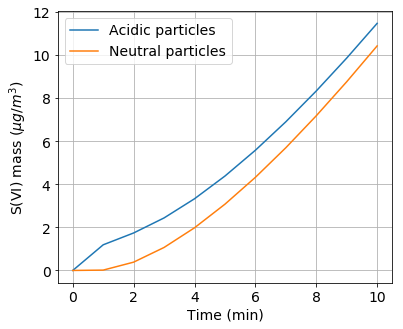

In [49]:
mpl.rcParams['figure.figsize'] = 6, 5
directory = "mono_nacl"
i = 0
su_dry_neut = np.zeros(11)
su_dry_acid = np.zeros(11)
nh4_dry_neut = np.zeros(11)
nh4_dry_acid = np.zeros(11)

for subdir, dirs, files in os.walk(directory):
    for file in files:
        filename = subdir + os.sep + file
        #if filename.endswith("_process.nc"):
        if ("process" in filename) and ("00" in filename):
         n = int(filename[-13:-11]) # Get the order of the files
         print(filename)
         print(n)
         if n > 1: 
          ncf  = scipy.io.netcdf_file(filename, mmap=False)
          su_dry_neut_temp = ncf.variables["su_neut_dry_dist"].data * 1e9
          su_dry_acid_temp = ncf.variables["su_acid_dry_dist"].data * 1e9
          su_dry_neut[n-1] = su_dry_neut_temp[np.nonzero(su_dry_neut_temp)]
          su_dry_acid[n-1] = su_dry_acid_temp[np.nonzero(su_dry_acid_temp)]
          print(su_dry_neut)
          print(su_dry_acid)
         #nh4_dry_neut_temp = ncf.variables["nh4_neut_dry_dist"].data * 1e9
         #nh4_dry_acid_temp = ncf.variables["nh4_acid_dry_dist"].data * 1e9
         #nh4_dry_neut[n-1] = nh4_dry_neut_temp[np.nonzero(nh4_dry_neut_temp)]
         #nh4_dry_acid[n-1] = np.max(nh4_dry_acid_temp)
         #print(nh4_dry_neut)
         #print(nh4_dry_acid)
#plt.subplot(121)
plt.plot(su_dry_acid, label='Acidic particles')
plt.plot(su_dry_neut, label='Neutral particles')
plt.grid()
plt.legend(loc=2)
plt.xlabel('Time (min)')
plt.ylabel('S(VI) mass ($\mu g/m^3$)')

#plt.subplot(122)
#plt.plot(nh4_dry_neut,'o', label='Neutral particles')
#plt.plot(nh4_dry_acid,'o', label='Acidic particles')
#plt.grid()
#plt.legend(loc=1)
#plt.xlabel('Time (min)')
#plt.ylabel(r'$\rm NH_4^+$ mass ($\mu {\rm g/m^3}$)')
plt.savefig("mono_nacl/figure/mass_sul_nh4.pdf")

# Analyze the pH

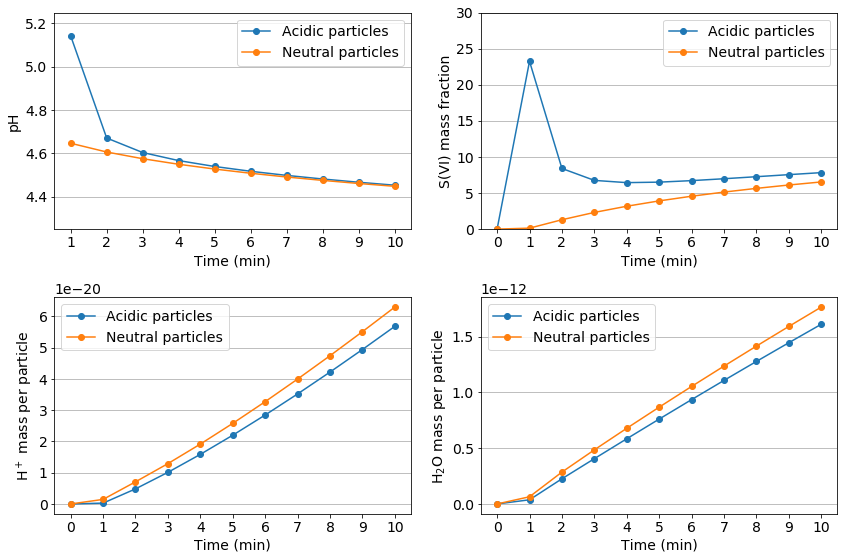

In [48]:
import sys, os
import matplotlib.pyplot as plt
import matplotlib
import scipy.io, numpy
import numpy as np
import pylab
import csv
import pandas as pd
import seaborn as sns
#np.set_printoptions(threshold=np.nan)
import sys, os
import matplotlib.pyplot as plt
import matplotlib
import scipy.io, numpy
import numpy as np
import pylab
import csv
import pandas as pd
import seaborn as sns
#np.set_printoptions(threshold=np.nan)
mpl.rcParams['figure.figsize'] = 12, 8
f1  = 'mono_nacl/log_acid_nacl'
f2  = 'mono_nacl/log_neut_nacl'
acid_particle = pd.read_csv(f1, delim_whitespace=True, header=None)
neut_particle = pd.read_csv(f2, delim_whitespace=True, header=None)

val1 = acid_particle.values
val2 = neut_particle.values
# Creat dataframe
#d1 = {'pH_acid': val1[:,0], 'nh4_acid': val1[:,1], 'so4_acid':val1[:,2]}
#d2 = {'pH_neut': val1[:,0], 'nh4_neut': val1[:,1], 'so4_neut':val1[:,2]}
df1 = pd.DataFrame(data=val1)
df2 = pd.DataFrame(data=val2)


####ACID PARTICLES######
ph_acid = df1.iloc[:,0].values.reshape((11, 27))
ph_acid_mean = np.mean(ph_acid.astype(float), axis=1)
ph_acid_std  = np.std(ph_acid.astype(float), axis=1)


su_frac_acid = df1.iloc[:,1].values.reshape((11, 27))
su_frac_acid_mean = np.mean(su_frac_acid.astype(float), axis=1)
su_frac_acid_std  = np.std(su_frac_acid.astype(float), axis=1)

hp_acid = df1.iloc[:,2].values.reshape((11, 27))
hp_acid_mean = np.mean(hp_acid.astype(float), axis=1)
hp_acid_std  = np.std(hp_acid.astype(float), axis=1)


h2o_acid = df1.iloc[:,3].values.reshape((11, 27))
h2o_acid_mean = np.mean(h2o_acid.astype(float), axis=1)
h2o_acid_std  = np.std(h2o_acid.astype(float), axis=1)

####NEUTRAL PARTICLES######
ph_neut = df2.iloc[:,0].values.reshape((11, 26))
ph_neut_mean = np.mean(ph_neut.astype(float), axis=1)
ph_neut_std  = np.std(ph_neut.astype(float), axis=1)

su_frac_neut = df2.iloc[:,1].values.reshape((11, 26))
su_frac_neut_mean = np.mean(su_frac_neut.astype(float), axis=1)
su_frac_neut_std  = np.std(su_frac_neut.astype(float), axis=1)

hp_neut = df2.iloc[:,2].values.reshape((11, 26))
hp_neut_mean = np.mean(hp_neut.astype(float), axis=1)
hp_std  = np.std(hp_neut.astype(float), axis=1)

h2o_neut = df2.iloc[:,3].values.reshape((11, 26))
h2o_neut_mean = np.mean(h2o_neut.astype(float), axis=1)
h2o_neut_std  = np.std(h2o_neut.astype(float), axis=1)
#ph_temp = df2['pH_neut'].astype(float)
#print(type(df1.iloc[:,0].values))
ind = np.arange(10)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence
#std = np.std(ph_acid[1:10,])
plt.subplot(221)
plt.ylim(4.25,5.25)
#plt.bar(ind, ph_acid_mean[1:11], width, yerr = ph_acid_std[1:11] , label='Acidic particles')
#plt.bar(ind + width, ph_neut_mean[1:11], width, yerr = ph_neut_std[1:11], label='Neutral particles')
#plt.xticks(ind + width / 2, np.arange(start = 1, stop = 11))
plt.plot(ind, ph_acid_mean[1:11],marker='o', label='Acidic particles')
plt.plot(ind, ph_neut_mean[1:11],marker='o', label='Neutral particles')
plt.legend(loc=1)
plt.grid(axis='y')
plt.ylabel('pH')
plt.xlabel('Time (min)')
plt.xticks(ind, np.arange(start = 1, stop = 11))

ind1 = np.arange(11)
plt.subplot(222)
plt.ylim(0,30)
#plt.bar(ind, ph_acid_mean[1:11], width, yerr = ph_acid_std[1:11] , label='Acidic particles')
#plt.bar(ind + width, ph_neut_mean[1:11], width, yerr = ph_neut_std[1:11], label='Neutral particles')
#plt.xticks(ind + width / 2, np.arange(start = 1, stop = 11))
plt.plot(ind1, su_frac_acid_mean,marker='o', label='Acidic particles')
plt.plot(ind1, su_frac_neut_mean,marker='o', label='Neutral particles')
plt.legend(loc=1)
plt.grid(axis='y')
plt.ylabel('S(VI) mass fraction')
plt.xlabel('Time (min)')
plt.xticks(ind1, np.arange(start = 0, stop = 11))

plt.subplot(223)
#plt.bar(ind, ph_acid_mean[1:11], width, yerr = ph_acid_std[1:11] , label='Acidic particles')
#plt.bar(ind + width, ph_neut_mean[1:11], width, yerr = ph_neut_std[1:11], label='Neutral particles')
#plt.xticks(ind + width / 2, np.arange(start = 1, stop = 11))
plt.plot(ind1, hp_acid_mean, marker='o', label='Acidic particles')
plt.plot(ind1, hp_neut_mean, marker='o', label='Neutral particles')
plt.legend(loc=2)
plt.grid(axis='y')
plt.ylabel(r'$\rm H^+$ mass per particle')
plt.xlabel('Time (min)')
plt.xticks(ind1, np.arange(start = 0, stop = 11))

plt.subplot(224)
#plt.bar(ind, ph_acid_mean[1:11], width, yerr = ph_acid_std[1:11] , label='Acidic particles')
#plt.bar(ind + width, ph_neut_mean[1:11], width, yerr = ph_neut_std[1:11], label='Neutral particles')
#plt.xticks(ind + width / 2, np.arange(start = 1, stop = 11))
plt.plot(ind1, h2o_acid_mean, marker='o', label='Acidic particles')
plt.plot(ind1, h2o_neut_mean, marker='o', label='Neutral particles')
plt.legend(loc=2)
plt.grid(axis='y')
plt.ylabel(r'$\rm H_2O$ mass per particle')
plt.xlabel('Time (min)')
plt.xticks(ind1, np.arange(start = 0, stop = 11))

plt.savefig("mono_nacl/figure/Acid_neut_pH_comp.pdf")
plt.tight_layout()

# Gas mixing ratio

mono/urban_plume_aq_chem_0001_00000011.nc
11
mono/urban_plume_aq_chem_0001_00000001.nc
1
mono/urban_plume_aq_chem_0001_00000005.nc
5
mono/urban_plume_aq_chem_0001_00000004.nc
4
mono/urban_plume_aq_chem_0001_00000010.nc
10
mono/urban_plume_aq_chem_0001_00000007.nc
7
mono/urban_plume_aq_chem_0001_00000003.nc
3
mono/urban_plume_aq_chem_0001_00000002.nc
2
mono/urban_plume_aq_chem_0001_00000006.nc
6
mono/urban_plume_aq_chem_0001_00000009.nc
9
mono/urban_plume_aq_chem_0001_00000008.nc
8


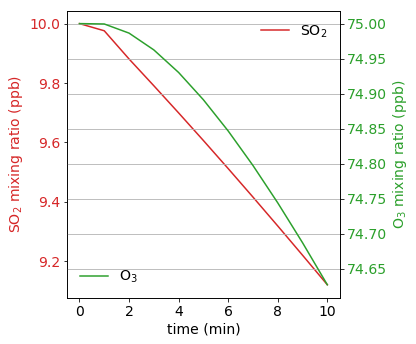

In [24]:
mpl.rcParams['figure.figsize'] = 7, 6
directory = "mono"
i = 0
so2 = np.zeros(11)
o3  = np.zeros(11)


for subdir, dirs, files in os.walk(directory):
    for file in files:
        filename = subdir + os.sep + file
        #if filename.endswith("_process.nc"):
        if "_0001_" in filename:
         n = int(filename[-5:-3]) # Get the order of the files
         print(filename)
         print(n)
         ncf  = scipy.io.netcdf_file(filename, mmap=False)
         gas  = ncf.variables["gas_mixing_ratio"].data
         so2[n-1] = gas[17]
         o3[n-1] = gas[10]

fig, ax1 = plt.subplots(figsize=(6,5))
color = 'tab:red'
ax1.set_xlabel('time (min)')
ax1.set_ylabel(r'$\rm SO_2$ mixing ratio (ppb)', color=color)
ax1.plot(so2,  ls='-', label=r'$\rm SO_2$', color=color)
#ax1.plot(time, num_conc2, color=color, ls=':', label='Case2 number no dilution' )
ax1.tick_params(axis='y', labelcolor=color)
ax1.legend(loc=1, frameon=False)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:green'
ax2.set_ylabel(r'$\rm O_3$ mixing ratio (ppb)', color=color)  # we already handled the x-label with ax1
ax2.plot(o3,  color = color, ls='-', label=r'$\rm O_3$')
ax2.tick_params(axis='y', labelcolor=color)
ax2.legend(loc=3, frameon=False)

plt.grid()
plt.tight_layout()
plt.savefig("mono/figure/gas_so2_o3.pdf")

# Mass fraction temporal variation

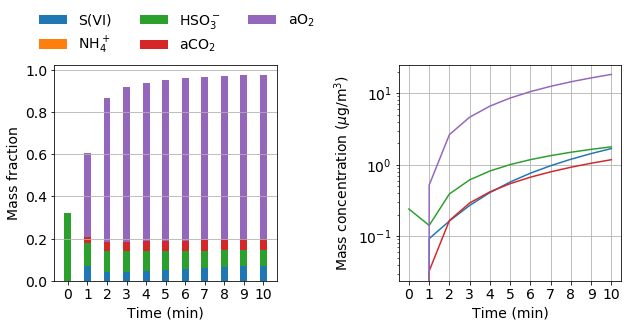

In [19]:
mpl.rcParams['figure.figsize'] = 9, 5
ncf     = scipy.io.netcdf_file("mono_nacl/urban_plume_aq_chem_process.nc",mmap=False)
dry_tot = ncf.variables["totdry_mass_conc"].data*1e9
SO4     = ncf.variables["tot_so4_conc"].data*1e9
HSO3m   = ncf.variables["tot_HSO3m_conc"].data*1e9 
aCO2    = ncf.variables["tot_aCO2_conc"].data*1e9
aO2     = ncf.variables["tot_aO2_conc"].data*1e9
NH4     = ncf.variables["tot_nh4_conc"].data*1e9
aSO2    = ncf.variables["tot_aSO2_conc"].data*1e9

plt.subplot(121)
ind1 = np.arange(11)
width = 0.35
plt.bar(ind1, SO4/dry_tot, width, label='S(VI)')
plt.bar(ind1, NH4/dry_tot, width, bottom = SO4/dry_tot, label=r'$\rm NH_4^+$')
plt.bar(ind1, HSO3m/dry_tot, width, bottom = NH4/dry_tot+SO4/dry_tot, label=r'$\rm HSO_3^-$')
plt.bar(ind1, aCO2/dry_tot, width, bottom = NH4/dry_tot+SO4/dry_tot+HSO3m/dry_tot, label=r'$\rm aCO_2$')
plt.bar(ind1, aO2/dry_tot, width, 
        bottom = NH4/dry_tot+SO4/dry_tot+HSO3m/dry_tot+aCO2/dry_tot, label=r'$\rm aO_2$')
plt.xticks(ind1, np.arange(start = 0, stop = 11))
plt.legend(loc='upper center', bbox_to_anchor=(0.55,1.3), ncol=3, frameon=False)
plt.grid(axis='y')
plt.ylabel('Mass fraction')
plt.xlabel('Time (min)')

plt.subplot(122)
plt.yscale('log')
plt.plot(ind1, SO4, label='S(VI)')
plt.plot(ind1, NH4, label=r'$\rm NH_4^+$')
plt.plot(ind1, HSO3m)
plt.plot(ind1, aCO2)
plt.plot(ind1, aO2)
plt.xticks(ind1, np.arange(start = 0, stop = 11))
plt.ylabel(r'Mass concentration ($\mu {\rm g/m^3}$)')
plt.grid()
plt.xlabel('Time (min)')

plt.tight_layout()
plt.savefig("mono_nacl/figure/mass_frac.pdf")

# Output every 1 second

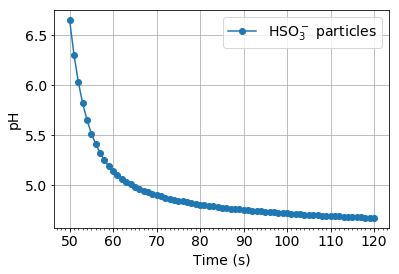

In [121]:
import sys, os
import matplotlib.pyplot as plt
import matplotlib
import scipy.io, numpy
import numpy as np
import pylab
import csv
import pandas as pd
import seaborn as sns
#np.set_printoptions(threshold=np.nan)
import sys, os
import matplotlib.pyplot as plt
import matplotlib
import scipy.io, numpy
import numpy as np
import pylab
import csv
import pandas as pd
import seaborn as sns
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)

#np.set_printoptions(threshold=np.nan)
mpl.rcParams['figure.figsize'] = 6, 4
f1  = 'mono_nacl/log_nacl_acid_1s'
f2  = 'mono_nacl/log_nacl_neut_1s'
acid_particle = pd.read_csv(f1, delim_whitespace=True, header=None)
neut_particle = pd.read_csv(f2, delim_whitespace=True, header=None)
acid_val = acid_particle.values
neut_val = neut_particle.values
# Creat dataframe
#d1 = {'pH_acid': val1[:,0], 'nh4_acid': val1[:,1], 'so4_acid':val1[:,2]}
#d2 = {'pH_neut': val1[:,0], 'nh4_neut': val1[:,1], 'so4_neut':val1[:,2]}
df1 = pd.DataFrame(data=acid_val)
ph_acid  = df1.iloc[:,0].values.reshape((121, 27))
hp_acid  = df1.iloc[:,2].values.reshape((121, 27))
h2o_acid = df1.iloc[:,3].values.reshape((121, 27))
ph_acid_mean = np.mean(ph_acid.astype(float), axis=1)

df2 = pd.DataFrame(data=neut_val)
ph_neut  = df2.iloc[:,0].values.reshape((121, 26))
hp_neut  = df2.iloc[:,2].values.reshape((121, 26))
h2o_neut = df2.iloc[:,3].values.reshape((121, 26))
ph_neut_mean = np.mean(ph_neut.astype(float), axis=1)

#ph_mean = np.mean(ph.astype(float), axis=1)
#ph_std  = np.std(ph.astype(float), axis=1)
#print(type(ph))
#plt.plot(hp)
fig, ax = plt.subplots()
ax.plot(ph_acid_mean,marker='o', label=r'$\rm HSO_3^-$ particles')
#ax.plot(ph_neut_mean,marker='o', label='NaCl particles')
ax.grid()
ax.xaxis.set_major_locator(MultipleLocator(10))
ax.xaxis.set_minor_locator(MultipleLocator(1))
plt.ylabel('pH')
plt.xlabel('Time (s)')
plt.legend(loc=1)
#major_ticks = np.arange(40, 121, 10)
#minor_ticks = np.arange(40, 121, 1)
#plt.xticks(major_ticks)
#plt.xticks(minor_ticks, minor=False)

#plt.savefig("mono_nacl/figure/pH_1s.pdf")

# Reaction rates

In [99]:
import sys, os
import matplotlib.pyplot as plt
import matplotlib
import scipy.io, numpy
import numpy as np
import pylab
import csv
import pandas as pd
import seaborn as sns
#np.set_printoptions(threshold=np.nan)
import sys, os
import matplotlib.pyplot as plt
import matplotlib
import scipy.io, numpy
import numpy as np
import pylab
import csv
import pandas as pd
import seaborn as sns
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)

#np.set_printoptions(threshold=np.nan)
mpl.rcParams['figure.figsize'] = 6, 4
f1  = 'mono_nacl/log_rates_acid'
f2  = 'mono_nacl/log_rates_neut'
acid_particle = pd.read_csv(f1, delim_whitespace=True, header=None)
neut_particle = pd.read_csv(f2, delim_whitespace=True, header=None)
acid_rates =  acid_particle.values
neut_rates =  neut_particle.values
df1 = pd.DataFrame(data=acid_rates)
df2 = pd.DataFrame(data=neut_rates)
rates1 = df1.iloc[0,2:]
rates2 = df2.iloc[0,2:]
ind1 = np.nonzero(rates1)[0]
ind2 = np.nonzero(rates2)[0]
print(ind1)
print(ind2)

[  0   1  14  28 138 146]
[  0   1  14  28 138]


In [101]:
print(rates1.values[ind1])
print(rates2.values[ind2])

[1.850694229514312 0.12736211153737714 0.015600903708197469
 61449.249521611884 0.0004469544848293085 39.82605638055121]
[1.6734656324352797 0.1122323815854835 0.013724821987338164
 55275.03639806925 0.00044742309397761135]


In [108]:
f3  = 'mono_nacl/log_spec_acid'
f4  = 'mono_nacl/log_spec_neut'
acid_spec = pd.read_csv(f3, delim_whitespace=True, header=None)
neut_spec = pd.read_csv(f4, delim_whitespace=True, header=None)
acid_spec_rates =  acid_spec.values
neut_spec_rates =  neut_spec.values
df3 = pd.DataFrame(data=acid_spec_rates)
df4 = pd.DataFrame(data=neut_spec_rates)
rates3 = df3.iloc[0,2:]
rates4 = df4.iloc[0,2:]
ind3 = np.nonzero(rates3)[0]
ind4 = np.nonzero(rates4)[0]
print(ind3)
print(ind4)
print(rates3.values[ind3])
print(rates4.values[ind4])

[ 57  72  80  81  85  87 101 107 109 113 132]
[ 57  72  81  85  87 107 109 113 132]
[1.850694229514312 0.015600903708197469 39.82605638055121
 0.0004469544848293085 0.12736211153737714 61449.249521611884
 -39.82605638055121 39.82650333503603 -2.369668128559254e-10
 -1.997572786712552e-12 -1.6307714785242302e-11]
[1.6734656324352797 0.013724821987338164 0.00044742309397761135
 0.1122323815854835 55275.03639806925 0.00044742309397761135
 -2.881876561862805e-10 -2.363552739561793e-12 -1.932754779687753e-11]


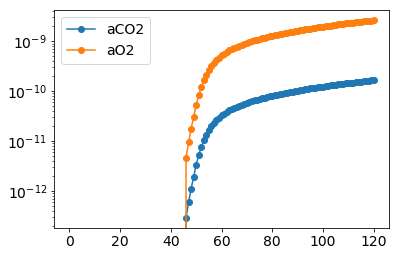

In [120]:
temp1 = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
   0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
   0, 0, 2.89665611005999e-13, 5.90268199514664e-13, 1.11603253711334e-12,
   1.91155245209762e-12, 3.36954971647116e-12, 5.23376823184674e-12,
   7.5905692416024e-12, 1.0342468381799e-11, 1.3375012126662e-11,
   1.65793666329188e-11, 1.98632467912775e-11, 2.3154958746527e-11,
   2.64032576714356e-11, 2.95748936972056e-11, 3.26511665946745e-11,
   3.5624353935714e-11, 3.84944650736199e-11, 4.12665364648421e-11,
   4.39485794683052e-11, 4.65500574489751e-11, 4.90808217567467e-11,
   5.15504319835062e-11, 5.39677528341989e-11, 5.63407485648276e-11,
   5.86764106493469e-11, 6.0980741470024e-11, 6.32588483919391e-11,
   6.55150212559259e-11, 6.77528316831218e-11, 6.99752337717151e-11,
   7.21846448887701e-11, 7.43830689696022e-11, 7.65721416633081e-11,
   7.87531985567581e-11, 8.0927333661672e-11, 8.30954412756424e-11,
   8.52582628425456e-11, 8.74164097436017e-11, 8.95703913365017e-11,
   9.17206329109066e-11, 9.3867493044238e-11, 9.6011276269331e-11,
   9.8152243914392e-11, 1.00290622099358e-10, 1.02426607408455e-10,
   1.04560371844624e-10, 1.06692067987174e-10, 1.08821831616001e-10,
   1.10949784455458e-10, 1.13076036307439e-10, 1.15200686821038e-10,
   1.17323826848663e-10, 1.1944553993289e-10, 1.21565902218903e-10,
   1.23684984171374e-10, 1.25802850929302e-10, 1.27919562915246e-10,
   1.30035176299666e-10, 1.32149743467466e-10, 1.34263313367933e-10,
   1.36375931775668e-10, 1.38487641648024e-10, 1.40598483307635e-10,
   1.42708494655356e-10, 1.44817711422018e-10, 1.46926167261539e-10,
   1.49033894185555e-10, 1.51140922334222e-10, 1.53247280074893e-10,
   1.55352994301264e-10, 1.5745809052182e-10, 1.59562592992346e-10,
   1.61666524592888e-10, 1.6376990725316e-10, 1.6587276173002e-10]
temp2 = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
    0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
    0, 0, 4.60562909380226e-12, 9.38480543950225e-12, 1.77433906861187e-11, 
    3.03899405335557e-11, 5.35672533051425e-11, 8.32004880860936e-11, 
    1.20661747791978e-10, 1.64400578654119e-10, 2.12597030644808e-10, 
    2.63520745574678e-10, 3.15704647053705e-10, 3.68009140964315e-10, 
    4.19619794042648e-10, 4.7000827279214e-10, 5.18877538155548e-10, 
    5.66105043781456e-10, 6.11691120481056e-10, 6.55715979902241e-10, 
    6.98307089532004e-10, 7.39614967677109e-10, 7.79796275423591e-10, 
    8.19003016017065e-10, 8.57376128523577e-10, 8.9504222776133e-10, 
    9.32112456677846e-10, 9.68682229403805e-10, 1.00483272835431e-09, 
    1.04063214074444e-09, 1.07613723411544e-09, 1.1113949592801e-09, 
    1.14644373630495e-09, 1.18131541482346e-09, 1.21603598942399e-09, 
    1.25062668616591e-09, 1.28510489198359e-09, 1.31948481912873e-09, 
    1.35377825310013e-09, 1.38799491017456e-09, 1.42214288461384e-09, 
    1.45622893685236e-09, 1.49025876518598e-09, 1.5242372126945e-09, 
    1.55816843272137e-09, 1.59205602115971e-09, 1.62590309814539e-09, 
    1.65971240426833e-09, 1.69348636177769e-09, 1.72722712973195e-09, 
    1.76093664379933e-09, 1.79461665032277e-09, 1.82826873302395e-09, 
    1.86189433758925e-09, 1.89549479074514e-09, 1.929071306677e-09, 
    1.9626250033187e-09, 1.99615691695625e-09, 2.02966800842478e-09, 
    2.063159171187e-09, 2.09663123824876e-09, 2.13008498829517e-09, 
    2.16352114948789e-09, 2.19694040461787e-09, 2.23034339500124e-09, 
    2.26373072358436e-09, 2.29710295848592e-09, 2.33046063487774e-09, 
    2.36380426185711e-09, 2.39713431875707e-09, 2.43045125696484e-09, 
    2.46375550420374e-09, 2.49704746602166e-09, 2.53032752720656e-09, 
    2.56359605344852e-09, 2.59685339288555e-09, 2.63009987564789e-09]
plt.yscale('log')
plt.plot(temp1, label='aCO2', marker='o')
plt.plot(temp2, label='aO2', marker='o')
plt.legend(loc=2)